## Module 01: Practical Stats

### Lesson 11: Confidence Intervals

> Learn how to use sampling distributions and bootstrapping to create a confidence interval for any parameter of interest.

#### 01. Video: Introduction

This idea that providing an interval and not just a single estimate will help us gain confidence in our ability to capture a population parameter is at the **core of confidence intervals**.

And the wider our interval, the more confident we can be that we capture our parameter of interest.


#### 02. Video: From Sampling Distributions to Confidence Intervals

We can use **bootstrapping** and **sampling distributions** to build **confidence intervals** for our parameters of interest.

By finding the statistic that best estimates our parameter(s) of interest (say the **sample mean** to estimate the **population mean** or the **difference in sample means** to estimate **the difference in population means)**, we can easily build confidence intervals for the parameter of interest.

If we want a **95 percent confidence interval**, we could cut off two and a half percent from here and another two and a half percent from up here. These values would then give the range where we believe the parameter would be, with 95 percent confidence.

If alternatively, we wanted a **99 percent confidence interval**, we would cut off a half a percent from each side, and these values would then give the range where we believe the parameter to be with 99 percent confidence.

#### 03. ScreenCast: Sampling Distributions and Confidence Intervals

In this video, you saw an example of how to **build a confidence interval** using the **sampling distribution of the statistic** that best estimates your parameter of interest. In this case, we used a **sample mean height** to estimate the **population mean height**.

You can interpret your confidence interval as **We are 95% confident**, **the population mean falls between the bounds that you find**. Notice that the percent and the parameter can both change depending on what you are building your confidence interval for, and what percentage you cutoff in each tail.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200)

In [2]:
coffee_full.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [3]:
coffee_red.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [4]:
coffee_full.shape

(2974, 4)

In [5]:
coffee_red.shape

(200, 4)

In [6]:
coffee_red.drinks_coffee.mean()

0.595

In [7]:
coffee_red[coffee_red['drinks_coffee'] == True]['height'].mean()

68.11962990858616

In [8]:
bootsample = coffee_red.sample(200, replace=True)
bootsample[bootsample['drinks_coffee'] == True]['height'].mean()

68.25918199231296

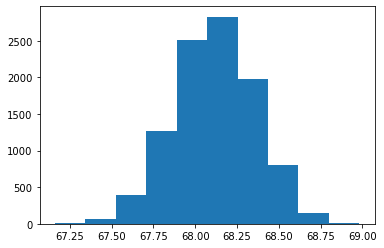

In [9]:
boot_means = []
for _ in range(10000):
    bootsample = coffee_red.sample(200, replace=True)
    boot_means.append(bootsample[bootsample['drinks_coffee'] == True]['height'].mean())
    
plt.hist(boot_means);

In [10]:
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

(67.64048764043895, 68.57673511896192)

In [11]:
coffee_full[coffee_full['drinks_coffee'] == True]['height'].mean()

68.40021025548381

**Pro Tip**

* The random seed for this workbook was set to np.random.**seed(42)**
* To see how well our confidence intervals perform, having the population data will be helpful
* Confidence interval interpretation: We are 95% confident the mean height of all coffee drinkers is between the 68.06 and 68.97 inches tall

#### 04. Notebook + Quiz: Building Confidence Intervals

**Confidence Intervals for the Population Mean**

In the previous video, you saw how we could build a confidence interval for the population mean. To get some practice, you will do the same process to create a confidence interval for the **population mean height of non-coffee drinkers**. Additionally, there are some quiz questions available below the python notebook to assure your results are accurate.

In [12]:
# First let's read in the necessary libraries and the dataset.  
# You also have the full and reduced versions of the data available.  
# The reduced version is an example of you would actually get in practice, 
# as it is the sample.  While the full data is an example of everyone 
# in your population.

coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200) 

In [13]:
# `1.` What is the proportion of coffee drinkers in the sample? 
# What is the proportion of individuals that don't drink coffee?

coffee_red.query('drinks_coffee == True').user_id.count() / coffee_red.shape[0]

0.6

In [14]:
coffee_red.query('drinks_coffee == False').user_id.count() / coffee_red.shape[0]

0.4

In [15]:
# `2.` Of the individuals who drink coffee, what is the average height? 
# Of the individuals who do not drink coffee, what is the average height?

coffee_red.query('drinks_coffee == True').height.mean()

68.1287842478681

In [16]:
coffee_red.query('drinks_coffee == False').height.mean()

67.16234742401964

In [17]:
# `3.` Simulate 200 "new" individuals from your original sample of 200.  
# What are the proportion of coffee drinkers in your bootstrap sample?  
# How about individuals that don't drink coffee?

bootstrap_sample = coffee_red.sample(200, replace=True)

bootstrap_sample.query('drinks_coffee == True').user_id.count()/bootstrap_sample.shape[0]

0.65

In [18]:
bootstrap_sample.query('drinks_coffee == False').user_id.count()/bootstrap_sample.shape[0]

0.35

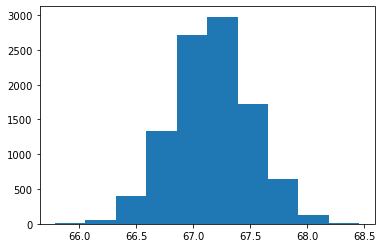

In [19]:
# `4.` Now simulate your bootstrap sample 10,000 times and take the mean 
# height of the non-coffee drinkers in each sample. Each bootstrap sample 
# should be from the very first sample of 200 data points. Plot the 
# distribution, and pull the values necessary for a 95% confidence interval.  
# What do you notice about the sampling distribution of the mean 
# in this example?

bootstrap_means = [coffee_red.sample(200, replace=True).query('drinks_coffee == False').height.mean() for _ in range(10000)]

plt.hist(bootstrap_means);

In [20]:
np.percentile(bootstrap_means, 2.5), np.percentile(bootstrap_means, 97.5)

(66.49505612168473, 67.84409946951597)

In [21]:
# `5.`  Did your interval capture the actual average height of non-coffee 
# drinkers in the population?  Look at the average in the population and the 
# two bounds provided by your 95% confidence interval, and then answer the 
# final quiz question below.

coffee_full.query('drinks_coffee == False').height.mean()

66.443407762147

In [22]:
np.mean(bootstrap_means)

67.16230928458937

**Question 1**

* Use the results for the first two questions to match the following descriptions to the correct values.
    1. Proportion of sample that drinks coffee(**Answer: 0.595**)
    2. Proportion of sample that does not drink coffee(**Answer: 0.405**)
    3. Average height for sample members that drink coffee(**Answer: 68.12**)
    4. Average height for sample members that do not drink coffee(**Answer: 66.78**)

**Question 2**

* Did the proportion of coffee drinkers in your bootstrap sample exactly match the proportion in the original sample?
    * [ ] Yes
    * [x] No(**Answer**: $\small 0.595 != 0.62$)

**Question 3**

* Use your answers to the final questions in the notebook to match each value to its corresponding description.
    1. What is the lower bound of your 95% confidence interval for the mean height of those who do not drink coffee in your population?(**Answer: 65.99**)
    2. What is the upper bound of your 95% confidence interval for the mean height of those who do not drink coffee in your population?(**Answer: 67.58**)
    3. What is the value for the mean height of those who do not drink coffee in your population?(**Answer: 66.44**)
    4. Did your interval capture the true mean height for the non-coffee drinkers?(**Answer: Yes. 66.44 in (65.99, 67.58)**)
    5. Was the sample mean height for non-coffee drinkers the same as the population mean height for non-coffee drinkers?(**Answer: No. 66.78 != 66.44**)

**Question 4**

* What percentage would we cut off of each tail if we wanted to build a 98% confidence interval?
    * [ ] 0.5%
    * [x] 1%
    * [ ] 2%  
    * [ ] 2.5%

#### 05. ScreenCast: Difference In Means

In this video, you built a **confidence interval** for the difference of the **average heights for coffee drinkers and non-coffee drinkers**. The interval was built at a **95% confidence level**, and since the difference did not contain zero, this suggested there was truly a difference in the average heights in the population of coffee drinkers as compared to non-coffee drinkers.

Specifically, we can be 95% confident that **the difference in the average heights for coffee drinkers as compared to non-coffee drinkers** was in the provided **interval of 0.59 to 2.37 inches**.

In [23]:
coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200) 

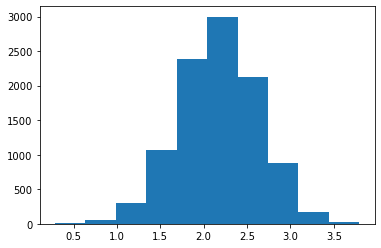

In [24]:
diffs = []
for _ in range(10000):
    boot_sample = coffee_red.sample(200, replace=True)
    mean_coff = boot_sample.query('drinks_coffee == True').height.mean()
    mean_nocoff = boot_sample.query('drinks_coffee == False').height.mean()
    diffs.append(mean_coff - mean_nocoff)

plt.hist(diffs);

In [25]:
np.percentile(diffs, 2.5), np.percentile(diffs, 97.5)

(1.2700586574505808, 3.0596026033152994)

Notice the similarity of the wording to the last confidence interval you built. The highlighted portions signify the two parts that can change in your conclusions:
1. The confidence level.
2. The parameter you are capturing with your interval.

**Conclusion**:

Since a confidence interval for mean_coff - mean_nocoff is (0.59, 2.37), we have evidence of the mean height for coffee drinkers is larger than non-coffee drinkers.

#### 06. Notebook + Quiz: Difference in Means

In [26]:
# Here you will look through the example from the last video, 
# but you will also go a couple of steps further into what might actually 
# be going on with this data.

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

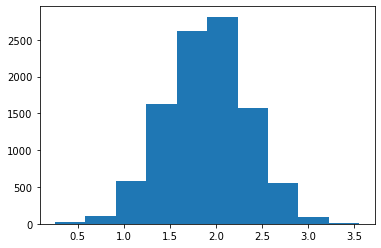

In [27]:
# `1.` For 10,000 iterations, bootstrap sample your sample data, compute the 
# difference in the average heights for coffee and non-coffee drinkers.  
# Build a 99% confidence interval using your sampling distribution.  
# Use your interval to start answering the first quiz question below.

bootstrap_diffs = []
for _ in range(10000):
    bootstrap_sample = sample_data.sample(200, replace=True)
    mean_coff = bootstrap_sample.query('drinks_coffee == True').height.mean()
    mean_nocoff = bootstrap_sample.query('drinks_coffee == False').height.mean()
    bootstrap_diffs.append(mean_coff - mean_nocoff)

plt.hist(bootstrap_diffs);

In [28]:
np.percentile(bootstrap_diffs, 0.5), np.percentile(bootstrap_diffs, 99.5)

(0.7555256067633974, 3.024545609245429)

In [29]:
np.percentile(bootstrap_diffs, 0.5) - np.percentile(bootstrap_diffs, 99.5)

-2.2690200024820317

In [30]:
full_data.query('drinks_coffee == True').height.mean() - full_data.query('drinks_coffee == False').height.mean()

1.9568024933368093

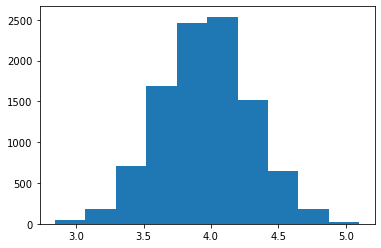

In [31]:
# `2.` For 10,000 iterations, bootstrap sample your sample data, compute the 
# difference in the average heights for those older than 21 and those younger 
# than 21.  Build a 99% confidence interval using your sampling distribution.  
# Use your interval to finish answering the first quiz question below.  

bootstrap_diffs = []
for _ in range(10000):
    bootstrap_sample = sample_data.sample(200, replace=True)
    bootstrap_ge = bootstrap_sample.query('age == ">=21"').height.mean()
    bootstrap_lt = bootstrap_sample.query('age == "<21"').height.mean() 
    bootstrap_diff = bootstrap_ge - bootstrap_lt  
    bootstrap_diffs.append(bootstrap_diff)

plt.hist(bootstrap_diffs);

In [32]:
np.percentile(bootstrap_diffs, 0.5), np.percentile(bootstrap_diffs, 99.5)

(3.089539681959755, 4.82602148816033)

In [33]:
np.percentile(bootstrap_diffs, 0.5) - np.percentile(bootstrap_diffs, 99.5)

-1.7364818062005747

In [34]:
full_data.query('age == ">=21"').height.mean() - full_data.query('age == "<21"').height.mean()

3.8822912499209963

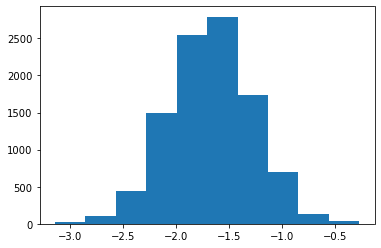

In [35]:
# `3.` For 10,000 iterations bootstrap your sample data, compute the 
# difference in the average height for coffee drinkers and the average 
# height for non-coffee drinkers for individuals under 21 years old.  
# Using your sampling distribution, build a 95% confidence interval.  
# Use your interval to start answering question 2 below.

bootstrap_diffs = []
for _ in range(10000):
    bootstrap_sample = sample_data.sample(200, replace=True)
    bootstrap_coff = bootstrap_sample.query('drinks_coffee == True and age == "<21"').height.mean()
    bootstrap_nocoff = bootstrap_sample.query('drinks_coffee == False and age == "<21"').height.mean()
    bootstrap_diffs.append(bootstrap_coff - bootstrap_nocoff)

plt.hist(bootstrap_diffs);

In [36]:
np.percentile(bootstrap_diffs, 5.5), np.percentile(bootstrap_diffs, 97.5)

(-2.2853287945639322, -0.9091241147897432)

In [37]:
np.percentile(bootstrap_diffs, 5.5) - np.percentile(bootstrap_diffs, 97.5)

-1.376204679774189

In [38]:
full_data.query('drinks_coffee == True and age == "<21"').height.mean() - full_data.query('drinks_coffee == False and age == "<21"').height.mean()

-1.69939009355123

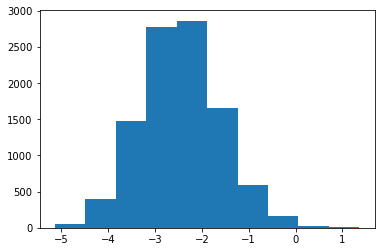

In [39]:
# `4.` For 10,000 iterations bootstrap your sample data, compute the 
# difference in the average height for coffee drinkers and the average height 
# for non-coffee drinkers for individuals over 21 years old.  Using your 
# sampling distribution, build a 95% confidence interval. Use your interval 
# to finish answering the second quiz question below. 
# As well as the following questions. 
# *(i'm assuming they mean 21 and over for this one...)*

bootstrap_diffs = []
for _ in range(10000):
    bootstrap_sample = sample_data.sample(200, replace=True)
    bootstrap_coff = bootstrap_sample.query('drinks_coffee == True and age == ">=21"').height.mean()
    bootstrap_nocoff = bootstrap_sample.query('drinks_coffee == False and age == ">=21"').height.mean()
    bootstrap_diffs.append(bootstrap_coff - bootstrap_nocoff)

plt.hist(bootstrap_diffs);

In [40]:
np.percentile(bootstrap_diffs, 5.5), np.percentile(bootstrap_diffs, 97.5)

(-3.766617978734908, -0.7257690325214319)

In [41]:
np.percentile(bootstrap_diffs, 5.5) - np.percentile(bootstrap_diffs, 97.5)

-3.040848946213476

In [42]:
full_data.query('drinks_coffee == True and age == ">=21"').height.mean() - full_data.query('drinks_coffee == False and age == ">=21"').height.mean()

-1.9509354889788568

In [43]:
# Within the under 21 and over 21 groups, on average, non-coffee drinkers 
# were taller.  But, when combined, we saw that on average coffee drinkers 
# were on average taller.  This is again **Simpson's paradox**, and 
# essentially there are more adults in the dataset who were coffee drinkers.  
# So these individuals made it seem like coffee drinkers were on average 
# taller - which is a misleading result.  

# A larger idea for this is the idea of confounding variables altogether.  
# You will learn even more about these in the regression section of the course.

**Quiz 1**

* Use the results from the first two questions above to answer match each **True** and False to the correct corresponding statements.
    * [x] Based on the confidence interval in the first question, you have evidence that coffee drinkers are on average taller than non-coffee drinkers.
    * [ ] In every bootstrapped instance in the first question, the difference in your averages suggested that coffee drinkers are on average taller than non-coffee drinkers.
    * [x] Based on the confidence interval in the second question, you have evidence that those older than 21 are on average taller than those younger than 21.
    * [x] In every bootstrapped instance in the second question, the difference in your averages suggested that those older than 21 are on average taller than those younger than 21.

**Quiz 2**

* Use the results from the last two questions above to select the single **False** statement below.
    * [ ] The intervals in the last two questions provide statistical evidence that on average coffee drinkers are shorter than non-coffee drinkers for both age ranges.
    * [ ] The intervals in the last two parts are narrower than the intervals from in the first parts.
    * [x] Though those older than 21 were on average shorter when drinking coffee, those younger than 21 were on average taller when drinking coffee.


**Quiz 3**

* In the first intervals, you had evidence that the average height of coffee drinkers was taller, but in the final intervals, you had evidence that coffee drinkers in each group were actually shorter. What was this an example of:
    * [ ] **The Empirical Rule(经验法则)**
    * [ ] **Ocaam's Razor(奥卡姆剃刀)**
    * [ ] Mathematical Error
    * [x] Simpson's Paradox

#### 07. Video: Confidence Interval Applications

Though you were comparing the average heights of coffee drinkers to non-coffee drinkers, there are a number of other applications that use a comparison for the means of two groups.

So what are some of the scenarios for which we would want to build a confidence interval for the difference in means?

* we could look at the effectiveness of different drugs by comparing two groups who take two different drugs, or comparing a group that takes a drug to a group that did not take a drug at all. This type of testing is common for any of the health conditions around the world.
* Another use case specific to learning could be to implement two different ways of teaching the same topic and see which way improves retention.

One of the most common use cases for comparing two groups in this way is known as **A/B testing(A/B测试)**, where we compared different webpages to one another to determine which web designs drive the largest amount of traffic.

A/B testing is one of the most important to businesses around the world. In this technique, you are changing something about your web layout to understand how it impacts users. You ideally want to provide a page that leads to more clicks, higher revenue, and/or higher customer satisfaction.


#### 08. Video: Statistical vs. Practical Significance

We found that creating a confidence interval for the differences in means of two groups, rather than just comparing two point value estimates, is important to assure that the differences are not just occurring due to the randomness associated with the sample that was chosen.

Confidence intervals are certainly useful. But there are issues that can arise when exclusively using confidence intervals to make decisions.

**practical and statistical significance**

**Statistical Significance(统计显著性)** show that evidence from hypothesis tests and confidence intervals that $\small H_1$ is True.

Using **confidence intervals** and **hypothesis testing**, you are able to provide statistical significance in making decisions.

However, it is also important to take into consideration **Practical Significance(实际显著性)** in making decisions. Practical significance takes into consideration other factors of your situation that might not be considered directly in the results of your hypothesis test or confidence interval. Constraints like space, time, or money are important in business decisions. However, they might not be accounted for directly in a statistical test.


#### 09. Statistical vs. Practical Significance

* If a weight loss drug helped individuals lose on average 0.5 lbs over the course of 5 years, which of the following are true statements about this result?

* [ ] This would definitely not be statistically significant.
* [x] This would definitely not be practically significant.
* [ ] This would be more likely to be statistically significant if we had smaller sample sizes.
* [x] This would be more likely to be statistically significant if we had larger sample sizes.


#### 10. Video: Traditional Confidence Intervals

**Why Bootstrapping**

Bootstrapping doesn't have the assumptions of these intervals. Bootstrapping only assumes the sample is representative of the population. With large samples, bootstrapping and traditional methods will provide essentially the same results.


**Traditional Confidence Interval Methods**

One educated, but potentially biased opinion on the traditional methods is that these methods are no longer necessary with what is possible with statistics with modern computing, and these methods will become even less important with the future of computing. Therefore, memorizing these formulas to throw at particular situation will be a glazed over component of this class. However, there are resources below should you want to dive into a few of the 100s if not 1000s of hypothesis tests that are possible with traditional techniques.

You might have seen equations like these for capturing a population mean or proportion.

$\large \bar{x} \pm t_{n-1}^* \frac{s}{\sqrt{n}}$
$\large p \pm z^* \frac{p(1-p)}{\sqrt{n}}$

Similarly, you might have seen equations like these for capturing the difference in means or the difference in proportions.

$\large \bar{x_1}-\bar{x_2} \pm t_{df}^* \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}$
$\large p_1 - p_2 \pm z^* \sqrt{\frac{(p_1)(1-p_1)}{n_1} + \frac{(p_2)(1-p_2)}{n_2}}$

All of these formulas have underlying assumptions that may or may not be true.

To learn more about the traditional methods, see the documentation [here](http://stattrek.com/hypothesis-test/hypothesis-testing.aspx) on the corresponding hypothesis tests.

#### 11. ScreenCast: Traditional Confidence Interval Methods

**Hypothesis Tests**

* **T-test(T检验)**(a one sample, used for the population mean)
* **Two sample T-test(双样本T检验)**(used for comparing two means)
* **Paired T-test(配对T检验)**(used for comparing an individual to themselves)
* **Z-test(Z检验)**
* **Chi-squared Test(卡方检验)**
* **F-test(F检验)**

In this video you saw **a comparison** of the traditional method for calculating a difference of means using a python built in to the bootstrapping method you have been using throughout this lesson.

In [44]:
import statsmodels.stats.api as sms

coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200) 

diffs = []
for _ in range(10000):
    boot_sample = coffee_red.sample(200, replace=True)
    mean_coff = boot_sample.query('drinks_coffee == True').height.mean()
    mean_nocoff = boot_sample.query('drinks_coffee == False').height.mean()
    diffs.append(mean_coff - mean_nocoff)

np.percentile(diffs, 2.5), np.percentile(diffs, 97.5)

(0.9449996060810054, 2.6727019502086264)

In [45]:
X1 = coffee_red.query('drinks_coffee == True').height
X2 = coffee_red.query('drinks_coffee == False').height

cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
cm.tconfint_diff(usevar='unequal')

(0.9425673257251523, 2.673794429588183)

With **large sample sizes**, these end up looking very similar. With **smaller sample sizes**, using a traditional methods likely has assumptions that are not true of your interval. **Small sample sizes are not ideal for bootstrapping methods though either, as they can lead to misleading results simply due to not accurately representing your entire population well**.

**Pro Tip**

* Understanding sampling distributions and bootstrapping means that you can simulate the results of any confidence interval you want to build.
* For any of the other confidence intervals or hypothesis tests, you can finde how to do them with a quick search.


#### 12. Video: Other Language Associated with Confidence Intervals

It is important to understand the way that** your sample size** and **confidence level** relate to the **confidence interval** you achieve at the end of your analysis.

Assuming you control all other items of your analysis:

1. Increasing your **sample size** will decrease the **width of your confidence interval**.
2. Increasing your **confidence level** (say 95% to 99%) will increase the **width of your confidence interval**.

You saw that you can compute:

1. The **Confidence Interval Width(置信区间宽度)** as the difference between your **upper and lower bounds** of your confidence interval.
2. The **Margin of Error(误差范围,MOE)** is half the confidence interval width, and the value that you add and subtract from your sample estimate to achieve your confidence interval final results.

#### 13. Other Language Associated with Confidence Intervals

**QUIZ1**

Imagine we build a confidence interval for a population mean to obtain a confidence interval with an upper bound of 20 and a confidence interval width of 8. Use this information to provide the value to each of the corresponding additional values.

| Value | Description |
| --- | --- |
|20|Upper Bound of the Confidence Interval|
|12|Lower Bound of the Confidence Interval|
|4|The Margin of Error|
|16|The Sample Mean|

**QUIZ2**

Which of the following statements are true?

* [x] If you increase your sample size, holding all other items constant, your confidence interval will narrow. 
* [ ] If you increase your sample size, holding all other items constant, your confidence interval will widen.
* [ ] If you increase your confidence level, holding all other items constant, your confidence interval will narrow.
* [x] If you increase your confidence level, holding all other items constant, your confidence interval will widen.


#### 14. Video: Correct Interpretations of Confidence Intervals

**Confidence Intervals (&Hypothesis Testing) vs. Machine Learning**

Confidence intervals take an **aggregate approach** towards the conclusions made based on data, as these tests are **aimed at understanding population parameters** (which are aggregate population values).

Alternatively, machine learning techniques take an **individual approach towards making conclusions**, as they attempt to **predict an outcome for each specific data point**.

In the final lessons of this class, you will learn about **two of the most fundamental machine learning approaches** used in practice: linear and logistic regression.


#### 15. Correct Interpretations of Confidence Intervals

Below are many interpretations of a confidence interval, but which is correct? What can we say from the ending results? Regardless of which page is "better," only one of these interpretations is possible from the results we obtain from a confidence interval.

* [ ] We are 95% confident that if a user receives Page A they are more likely to click than if they receive Page B.
* [ ] If a user receives Page A they are more likely to click than if they receive Page B.
* [x] We are 95% confident that the proportion of users that click through using Page A is higher than the average using Page B.

As a second check, try another interpretation question about whether a clinical drug works. Which of the below is a statement that you could make about the drug?

* [ ] We are 95% confident the drug will work for all patients that try it.
* [ ] There is a 95% chance that if an individual takes a drug it will work for them.
* [ ] We are 95% confident that on average the drug will work for the members of this specific population.


#### 16. Video: Confidence Intervals & Hypothesis Tests

The topics of confidence intervals and hypothesis testing essentially do the same thing. But depending on who you talk to or what source you're reading from, it's important to understand both.
 

#### 17. Text: Recap + Next Steps

**Review Quiz**

Match the statements below to the most appropriate term to recap the big ideas of this lesson.

| **Term** | **Statement** |
| --- | --- |
|97% Confidence Interval|By simulating the distribution of our statistic(s) of interest using bootstrapping, we can remove the bottom 1.5% and top 1.5% of the sampling distribution to build a _ |
|Bootstrapping|Sampling with replacement.|
|Sampling Distribution|The distribution of a statistic (any statistic).|
|Parameter|Confidence intervals provide a range of values that are possible for a _ |


**Recap**

In this lesson, you learned:

1. How to use your knowledge of **bootstrapping and sampling distributions** to create a **confidence interval** for any **population parameter**.
2. You learned how to build **confidence intervals** for the **population mean** and **difference in means**, but really the same process can be done for **any parameter** you are interested in.
3. You also learned about how to use **python built-in functions** to build confidence intervals, but that these **rely on assumptions** like the **Central Limit Theorem**.
4. You learned about the **difference between statistical significance and practical significance**.
5. Finally, you learned about **other language associated with confidence intervals** like **margin of error** and **confidence interval width**, and how to **correctly interpret your confidence intervals**. Remember, confidence intervals are about **parameters** in a population, and not about **individual observations**.

**What's Next**

The topics of confidence intervals and hypothesis testing essentially do the same thing, but depending on who you talk to or what source you are reading from, it is important to understand both.


#### 18. Appendix: Glossary

* numpy.random.seed(seed=None)
* numpy.percentile(a, q, axis=None)
* DataFrame.sample(n=None, replace=False, random_state=None, axis=None)

* * *

* The Empirical Rule(经验法则)
* Ocaam's Razor(奥卡姆剃刀)

* * *

* A/B testing(A/B测试)
* Statistical Significance(统计显著性)
* Practical Significance(实际显著性)
* T-test(T检验)
* Two sample T-test(双样本T检验)
* Paired T-test(配对T检验)
* Z-test(Z检验)
* Chi-squared Test(卡方检验)
* F-test(F检验)

* * *

* Confidence Interval Width(置信区间宽度)
* Margin of Error(误差范围,MOE)